In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

In [8]:
y = 0.5*x**2 + x+2+np.random.normal(0, 1, 100)

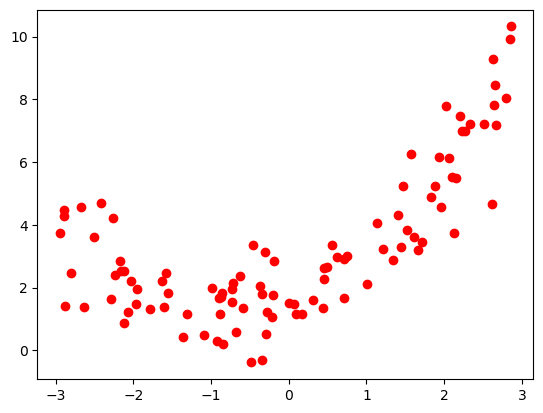

In [9]:
plt.scatter(x, y, color='r')

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
X2 = poly.transform(X)

In [14]:
X2[:5, 1]

array([ 1.66568264, -1.58372918, -1.30832323,  0.71550248, -2.94273202])

In [19]:
X[:5, :]

array([[ 1.66568264],
       [-1.58372918],
       [-1.30832323],
       [ 0.71550248],
       [-2.94273202]])

In [20]:
X2[:5, 2]

array([2.77449865, 2.5081981 , 1.71170968, 0.51194379, 8.65967172])

In [23]:
X5 = X[:5, 0]

In [24]:
X5**2

array([2.77449865, 2.5081981 , 1.71170968, 0.51194379, 8.65967172])

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

LinearRegression()

In [27]:
lin_reg2.coef_

array([0.        , 0.89650623, 0.55449832])

In [28]:
lin_reg2.intercept_

1.6364969715639563

In [29]:
y_predict = lin_reg2.intercept_ + lin_reg2.coef_[1]*x + lin_reg2.coef_[2]*(x**2)

In [30]:
y_predict.shape

(100,)

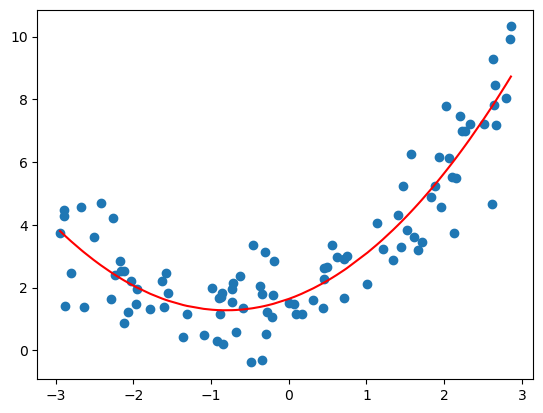

In [33]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

In [34]:
y_predict2 = lin_reg2.predict(X2)

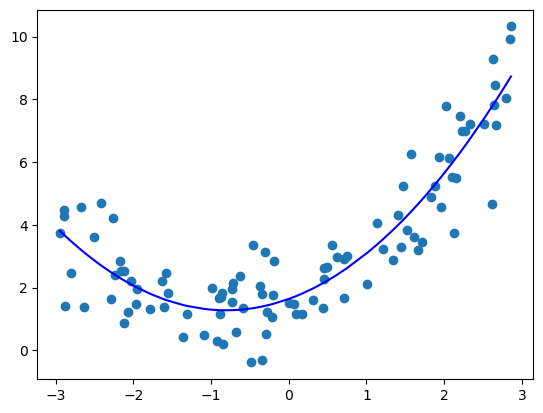

In [38]:
plt.scatter(x, y)
#plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='b')

# pipeline

In [39]:
from sklearn.preprocessing import PolynomialFeatures
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5*x**2 + x+2+np.random.normal(0, 1, 100)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [43]:
poly_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [44]:
y_predict = poly_reg.predict(X)

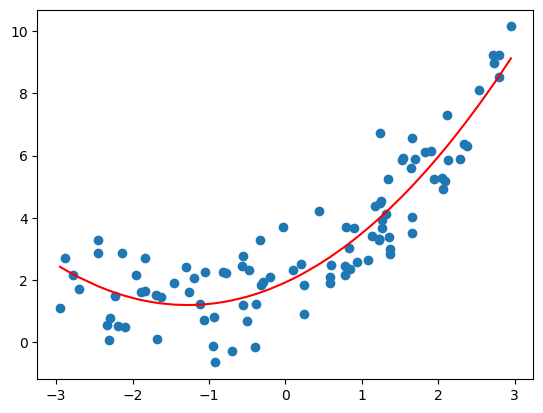

In [46]:
plt.scatter(x, y)
#plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')